# Project1
## Momentum Trading
### MACD

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
#from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import hvplot.pandas


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

### Collect Investments Data Using Alpaca: `AAPLE` (stocks) 

In [3]:
# Set current amount of shares
my_apple = 1

In [4]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [5]:
# Format current date as ISO format
start_time=pd.Timestamp('2023-10-30', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-10-31', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AAPL"]

# Set timeframe to "1Minute" for Alpaca API
timeframe = "1Min"

# Get current closing prices for AAPL and SP500
df_tickers=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df

df_tickers.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-30 08:00:00+00:00,168.75,168.98,168.75,68,168.98,1104,168.760054,AAPL
2023-10-30 08:01:00+00:00,168.84,168.90,168.84,43,168.90,1204,168.811561,AAPL
2023-10-30 08:02:00+00:00,168.88,168.88,168.70,28,168.70,1170,168.846556,AAPL
2023-10-30 08:03:00+00:00,168.84,168.84,168.60,50,168.63,3091,168.685086,AAPL
2023-10-30 08:04:00+00:00,168.88,168.88,168.88,20,168.88,788,168.886307,AAPL


In [6]:
# Reorganize the DataFrame
# Separate ticker data
df_tickers.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)

df_tickers.head()

,close
timestamp,
2023-10-30 08:00:00+00:00,168.75
2023-10-30 08:01:00+00:00,168.84
2023-10-30 08:02:00+00:00,168.88
2023-10-30 08:03:00+00:00,168.84
2023-10-30 08:04:00+00:00,168.88


### MACD formula

In [7]:
# Set MACD formula and iterate over Apple data for the specified intervals and period of time

moving_average_convergance_divergence_ema12 = df_tickers['close'].ewm(halflife=12).mean()
moving_average_convergance_divergence_ema26 = df_tickers['close'].ewm(halflife=26).mean()
  

In [8]:

MACD_line = moving_average_convergance_divergence_ema12 - moving_average_convergance_divergence_ema26
MACD_line.head()


timestamp
2023-10-30 08:00:00+00:00    0.000000
2023-10-30 08:01:00+00:00    0.000699
2023-10-30 08:02:00+00:00    0.001339
2023-10-30 08:03:00+00:00    0.001161
2023-10-30 08:04:00+00:00    0.001567
Name: close, dtype: float64

In [9]:
Signal_line = MACD_line.ewm(halflife=9).mean()
Signal_line.head()

timestamp
2023-10-30 08:00:00+00:00    0.000000
2023-10-30 08:01:00+00:00    0.000363
2023-10-30 08:02:00+00:00    0.000714
2023-10-30 08:03:00+00:00    0.000839
2023-10-30 08:04:00+00:00    0.001008
Name: close, dtype: float64

In [10]:
df_tickers=df_tickers.assign(ewm12=df_tickers['close'].ewm(halflife=12).mean())
df_tickers.head()

,close,ewm12
timestamp,,
2023-10-30 08:00:00+00:00,168.75,168.750000
2023-10-30 08:01:00+00:00,168.84,168.796299
2023-10-30 08:02:00+00:00,168.88,168.825826
2023-10-30 08:03:00+00:00,168.84,168.829682
2023-10-30 08:04:00+00:00,168.88,168.840940


In [11]:
df_tickers=df_tickers.assign(ewm26=df_tickers['close'].ewm(halflife=26).mean())
df_tickers.head()

,close,ewm12,ewm26
timestamp,,,
2023-10-30 08:00:00+00:00,168.75,168.750000,168.750000
2023-10-30 08:01:00+00:00,168.84,168.796299,168.795600
2023-10-30 08:02:00+00:00,168.88,168.825826,168.824486
2023-10-30 08:03:00+00:00,168.84,168.829682,168.828521
2023-10-30 08:04:00+00:00,168.88,168.840940,168.839373


In [12]:
df_tickers=df_tickers.assign(macd=MACD_line)
df_tickers.head()

,close,ewm12,ewm26,macd
timestamp,,,,
2023-10-30 08:00:00+00:00,168.75,168.750000,168.750000,0.000000
2023-10-30 08:01:00+00:00,168.84,168.796299,168.795600,0.000699
2023-10-30 08:02:00+00:00,168.88,168.825826,168.824486,0.001339
2023-10-30 08:03:00+00:00,168.84,168.829682,168.828521,0.001161
2023-10-30 08:04:00+00:00,168.88,168.840940,168.839373,0.001567


In [13]:
df_tickers=df_tickers.assign(signal=Signal_line)
df_tickers.head()

,close,ewm12,ewm26,macd,signal
timestamp,,,,,
2023-10-30 08:00:00+00:00,168.75,168.750000,168.750000,0.000000,0.000000
2023-10-30 08:01:00+00:00,168.84,168.796299,168.795600,0.000699,0.000363
2023-10-30 08:02:00+00:00,168.88,168.825826,168.824486,0.001339,0.000714
2023-10-30 08:03:00+00:00,168.84,168.829682,168.828521,0.001161,0.000839
2023-10-30 08:04:00+00:00,168.88,168.840940,168.839373,0.001567,0.001008


In [14]:
df_tickers=df_tickers.assign(histogram=MACD_line-Signal_line)
df_tickers.head()

,close,ewm12,ewm26,macd,signal,histogram
timestamp,,,,,,
2023-10-30 08:00:00+00:00,168.75,168.750000,168.750000,0.000000,0.000000,0.000000
2023-10-30 08:01:00+00:00,168.84,168.796299,168.795600,0.000699,0.000363,0.000336
2023-10-30 08:02:00+00:00,168.88,168.825826,168.824486,0.001339,0.000714,0.000625
2023-10-30 08:03:00+00:00,168.84,168.829682,168.828521,0.001161,0.000839,0.000322
2023-10-30 08:04:00+00:00,168.88,168.840940,168.839373,0.001567,0.001008,0.000559


In [15]:
Close_plot = df_tickers['close'].hvplot.line(    
    x='timestamp', 
    y='close',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Close_plot

:Curve   [timestamp]   (close)

In [16]:
MACD_plot = df_tickers['macd'].hvplot.line(    
    x='timestamp', 
    y='macd',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

In [17]:
Signal_plot = df_tickers['signal'].hvplot.line(    
    x='timestamp', 
    y='signal',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

In [18]:
plot = MACD_plot * Signal_plot 
display(Close_plot)
plot

:Curve   [timestamp]   (close)

:Overlay
   .Curve.Macd   :Curve   [timestamp]   (macd)
   .Curve.Signal :Curve   [timestamp]   (signal)

In [19]:
Histogram_plot = df_tickers['histogram'].hvplot.bar(    
    x='timestamp', 
    y='histogram',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='MACD-Signal', 
    xlabel='timestamp',
    title='MACD Line - Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Histogram_plot

:Bars   [timestamp]   (histogram)

In [20]:
# itterating over MACD line and Signal Line values of the same date in the final Data Frame above
df_tickers['return']=df_tickers['close'].pct_change()
display(df_tickers)




,close,ewm12,ewm26,macd,signal,histogram,return
timestamp,,,,,,,
2023-10-30 08:00:00+00:00,168.75,168.750000,168.750000,0.000000,0.000000,0.000000,NaN
2023-10-30 08:01:00+00:00,168.84,168.796299,168.795600,0.000699,0.000363,0.000336,0.000533
2023-10-30 08:02:00+00:00,168.88,168.825826,168.824486,0.001339,0.000714,0.000625,0.000237
2023-10-30 08:03:00+00:00,168.84,168.829682,168.828521,0.001161,0.000839,0.000322,-0.000237
2023-10-30 08:04:00+00:00,168.88,168.840940,168.839373,0.001567,0.001008,0.000559,0.000237
...,...,...,...,...,...,...,...
2023-10-30 23:54:00+00:00,169.84,169.826575,169.873051,-0.046476,-0.043556,-0.002921,0.000353
2023-10-30 23:56:00+00:00,169.86,169.828451,169.872708,-0.044257,-0.043608,-0.000649,0.000118
2023-10-30 23:57:00+00:00,169.85,169.829661,169.872111,-0.042450,-0.043522,0.001072,-0.000059


In [21]:
fund=10000
shares=fund/df_tickers.iloc[0,0]
print(f"Your Apple Shares are {shares}")

Your Apple Shares are 59.25925925925926


In [22]:
df_tickers["invest"]=df_tickers["close"] * shares
df_tickers.head()

,close,ewm12,ewm26,macd,signal,histogram,return,invest
timestamp,,,,,,,,
2023-10-30 08:00:00+00:00,168.75,168.750000,168.750000,0.000000,0.000000,0.000000,NaN,10000.000000
2023-10-30 08:01:00+00:00,168.84,168.796299,168.795600,0.000699,0.000363,0.000336,0.000533,10005.333333
2023-10-30 08:02:00+00:00,168.88,168.825826,168.824486,0.001339,0.000714,0.000625,0.000237,10007.703704
2023-10-30 08:03:00+00:00,168.84,168.829682,168.828521,0.001161,0.000839,0.000322,-0.000237,10005.333333
2023-10-30 08:04:00+00:00,168.88,168.840940,168.839373,0.001567,0.001008,0.000559,0.000237,10007.703704


In [23]:
df_tickers["X"]=np.where(df_tickers["macd"]>df_tickers["signal"],1,0) # Creating signals
df_tickers["X"]=df_tickers["X"].diff() # Finding long or short trades
Xreturns=df_tickers[df_tickers["X"].isin([1,-1])] # Extracting just the trades where -1 is long, 1 is short
Xreturns.reset_index(inplace=True)
trades = Xreturns[["X","timestamp","close","invest"]] # Dataframe with trade signals and dates
trades["sumclose"]=trades["close"].diff()
profitsbase=abs(trades["sumclose"]).sum()
trades["suminvest"]=trades["invest"].diff()
profitsshares=abs(trades["suminvest"]).sum()

/Users/pigeoneyevideography/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pigeoneyevideography/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
trades.head()

,X,timestamp,close,invest,sumclose,suminvest
0,1.0,2023-10-30 08:01:00+00:00,168.84,10005.333333,NaN,NaN
1,-1.0,2023-10-30 08:27:00+00:00,168.85,10005.925926,0.01,0.592593
2,1.0,2023-10-30 09:04:00+00:00,169.09,10020.148148,0.24,14.222222
3,-1.0,2023-10-30 10:19:00+00:00,169.02,10016.000000,-0.07,-4.148148
4,1.0,2023-10-30 11:01:00+00:00,169.18,10025.481481,0.16,9.481481


In [25]:
print(f"You made profit per share in MACD of ${profitsbase}")


You made profit per share in MACD of $8.632799999999946


In [26]:
print(profitsshares)

511.5733333333246


In [27]:
macd_profit=fund+profitsshares

In [28]:
print(f"You made profit per investement in MACD of ${macd_profit}")

You made profit per investement in MACD of $10511.573333333325


In [29]:
X_plot = trades['close'].hvplot.line(    
    x='timestamp', 
    y='close',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Decission Making Points', 
    xlabel='timestamp',
    title='Long and Short Signals',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

X_plot

:Curve   [timestamp]   (close)

In [30]:
# Format current date as ISO format
start_time=pd.Timestamp('2023-10-30', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-10-31', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["SPY"]

# Set timeframe to "1Minute" for Alpaca API
timeframe = "1Min"

# Get current closing prices for AAPL and SP500
df_spy=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df

df_spy.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-30 08:00:00+00:00,413.18,413.18,412.42,55,412.42,3271,413.039979,SPY
2023-10-30 08:01:00+00:00,413.19,413.19,413.13,21,413.13,1064,413.148148,SPY
2023-10-30 08:02:00+00:00,413.14,413.28,413.14,11,413.28,1072,413.238694,SPY
2023-10-30 08:03:00+00:00,413.09,413.17,413.03,22,413.06,2111,413.134737,SPY
2023-10-30 08:04:00+00:00,413.09,413.10,413.09,24,413.09,1432,413.095272,SPY


In [31]:
# Reorganize the DataFrame
# Separate ticker data
df_spy.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)

df_spy.head()

,close
timestamp,
2023-10-30 08:00:00+00:00,413.18
2023-10-30 08:01:00+00:00,413.19
2023-10-30 08:02:00+00:00,413.14
2023-10-30 08:03:00+00:00,413.09
2023-10-30 08:04:00+00:00,413.09


In [32]:
# Returns 
df_spy['return']=df_spy['close'].pct_change()
df_spy.head()


,close,return
timestamp,,
2023-10-30 08:00:00+00:00,413.18,NaN
2023-10-30 08:01:00+00:00,413.19,0.000024
2023-10-30 08:02:00+00:00,413.14,-0.000121
2023-10-30 08:03:00+00:00,413.09,-0.000121
2023-10-30 08:04:00+00:00,413.09,0.000000


In [33]:
# Cumulative returns
df_spy['cumprod']=(1+df_spy['return']).cumprod()
display(df_spy.head)

<bound method NDFrame.head of                             close    return   cumprod
timestamp                                            
2023-10-30 08:00:00+00:00  413.18       NaN       NaN
2023-10-30 08:01:00+00:00  413.19  0.000024  1.000024
2023-10-30 08:02:00+00:00  413.14 -0.000121  0.999903
2023-10-30 08:03:00+00:00  413.09 -0.000121  0.999782
2023-10-30 08:04:00+00:00  413.09  0.000000  0.999782
...                           ...       ...       ...
2023-10-30 23:55:00+00:00  415.30 -0.000144  1.005131
2023-10-30 23:56:00+00:00  415.28 -0.000048  1.005083
2023-10-30 23:57:00+00:00  415.25 -0.000072  1.005010
2023-10-30 23:58:00+00:00  415.13 -0.000289  1.004719
2023-10-30 23:59:00+00:00  415.18  0.000120  1.004841

[823 rows x 3 columns]>

In [34]:

df_spy['invest']=df_spy['cumprod']*fund
display(df_spy)

,close,return,cumprod,invest
timestamp,,,,
2023-10-30 08:00:00+00:00,413.18,NaN,NaN,NaN
2023-10-30 08:01:00+00:00,413.19,0.000024,1.000024,10000.242025
2023-10-30 08:02:00+00:00,413.14,-0.000121,0.999903,9999.031899
2023-10-30 08:03:00+00:00,413.09,-0.000121,0.999782,9997.821773
2023-10-30 08:04:00+00:00,413.09,0.000000,0.999782,9997.821773
...,...,...,...,...
2023-10-30 23:55:00+00:00,415.30,-0.000144,1.005131,10051.309357
2023-10-30 23:56:00+00:00,415.28,-0.000048,1.005083,10050.825306
2023-10-30 23:57:00+00:00,415.25,-0.000072,1.005010,10050.099230


In [35]:
spy_plot = df_spy['invest'].hvplot.line(    
    x='timestamp', 
    y='invest',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Cumulative Returns', 
    xlabel='timestamp',
    title='SPY Cumulative returns',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

spy_plot

:Curve   [timestamp]   (invest)

In [36]:
spy_profit=df_spy.iloc[-1,-1]
print(f"You made a profit of your SPY investement of $ {spy_profit}")

You made a profit of your SPY investement of $ 10048.405053487606


In [38]:
final_df=pd.DataFrame({"MACD": [macd_profit], "SPY":[spy_profit]})
final_df.head()

,MACD,SPY
0,10511.573333,10048.405053


<AxesSubplot:title={'center':'MACD vs SPY Investement'}>

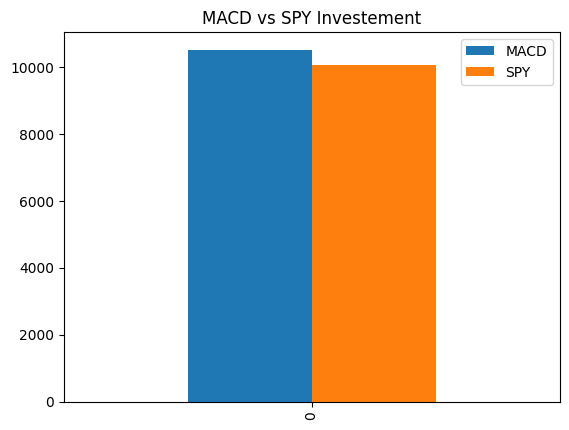

In [43]:

final_df.plot(kind ='bar', title='MACD vs SPY Investement')